In [1]:
# install tensorflow using pip
# pip3 install tensorflow 
# or 
# # pip3 install tensorflow-gpu

In [1]:
# if you want to skip local installation, use cocalc.com
# sign-up with GitHub/Google
# 1) create new project
# 2) choose JupyterNotebook as type
# 3) go to "Kernel" menu, and choose Python 3 (Anaconda)
# Now you have an IpythonPython Notebook with tensorflow installed, running in the Cloud

In [1]:
# let's import tensorflow as tf
import tensorflow as tf

In [1]:
# let's look at tensorflow types

In [5]:
# constants in tensorflow are variables that contain fixed values given on their creation
V1 = tf.constant([1.,2.])
# you can also pass explicit names 
V2 = tf.constant([3.,4.], name='const_V2')

In [6]:
# name arguments are useful if you want to save your variables to a binary file
# they are also used in TensorBoard, a visual representation of Tensorflow calculations (we will get to it later)

In [7]:
# these types produce tensors, tensor is a typed multy-dimensional array
print(V1)
print(V2)

Tensor("Const:0", shape=(2,), dtype=float32)
Tensor("const_V2:0", shape=(2,), dtype=float32)


In [8]:
# you can then conduct various operations on your tensors
V3 = V1 + V2
V4 = V1 * V2
print(V3)
print(V4)

Tensor("add:0", shape=(2,), dtype=float32)
Tensor("mul:0", shape=(2,), dtype=float32)


In [9]:
# the results won't be calculated, you need to call .eval() first
V3.eval()
V4.eval()

ValueError: Cannot evaluate tensor using `eval()`: No default session is registered. Use `with sess.as_default()` or pass an explicit session to `eval(session=sess)`

In [10]:
# that didn't work, all operations are evaluated within sessions
# let's create a session first
sess = tf.Session()

In [11]:
V3 = V1 + V2
print(V3)
V4 = V1 * V2
print(V4)

Tensor("add_1:0", shape=(2,), dtype=float32)
Tensor("mul_1:0", shape=(2,), dtype=float32)


In [12]:
V3.eval(session=sess)

array([ 4.,  6.], dtype=float32)

In [13]:
V4.eval(session=sess)

array([ 3.,  8.], dtype=float32)

In [14]:
# close the session
sess.close()

In [15]:
# interactive sessions can save you a lot of time
sess = tf.InteractiveSession()

In [16]:
V3 = V1 + V2
V4 = V1 * V2

In [17]:
# now we don't need to care about passing sessions
V3.eval()

array([ 4.,  6.], dtype=float32)

In [18]:
# working with placeholders
import numpy as np
# basically, we define the size and what the input type is
# at run time we initialize placeholders with data
x = tf.placeholder(tf.float32, shape=(1024, 1024))
y = tf.matmul(x, x)

In [19]:
# create a random array
rand_array = np.random.rand(1024, 1024)

In [20]:
# feed x with values
# this can only be done within sess.run(), the values are fed with "feed_dict" argument
print(sess.run(y, feed_dict={x: rand_array}))

[[ 254.09716797  247.88801575  254.52276611 ...,  261.5848999   255.67315674
   255.39112854]
 [ 250.11578369  251.37139893  255.15646362 ...,  259.06921387
   253.17379761  250.46192932]
 [ 249.11831665  250.2061615   254.80471802 ...,  252.65379333
   245.43525696  256.53482056]
 ..., 
 [ 253.9072113   250.64958191  251.12947083 ...,  256.73382568
   255.12088013  253.43313599]
 [ 246.02236938  244.79321289  252.03427124 ...,  251.02786255
   246.66542053  241.8664856 ]
 [ 246.4881134   249.84683228  251.52076721 ...,  257.9914856   249.4393158
   247.25868225]]


In [21]:
# another data type in Tensorflow in tf.Variable
# these are not constant, the values can be changed using .assign() method
w = tf.Variable([1.,3.], name='variable_w')

In [22]:
w.assign(w + 1.1)  # or w.assign_add(.1)

<tf.Tensor 'Assign:0' shape=(2,) dtype=float32_ref>

In [23]:
# now how do I get the value of w?

In [24]:
# we would need to initialize our w Variable for it to be used in our computations

In [25]:
# let's launch the graph in a session
with tf.Session() as sess:
    sess.run(w.initializer)
    print(w.eval())

[ 1.  3.]


In [26]:
# our w wasn't changed even though we called .assign() on it
# it needs to be initialized before we assign new values to it
with tf.Session() as sess:
    sess.run(w.initializer)
    print(w.assign(w + .1).eval())
    print(w.eval())

[ 1.10000002  3.0999999 ]
[ 1.10000002  3.0999999 ]


In [27]:
# what if we have multiple variables, do we have to initialize each of them?
w = tf.Variable([1.,3.], name='variable_1')
w2 = tf.Variable([2.,4.], name='variable_2')

In [28]:
# of course not, we can add an operation to initialize all variables we might have
init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)
    print(w.eval())
    print(w2.eval())

[ 1.  3.]
[ 2.  4.]


In [29]:
# let's start a new session
sess = tf.InteractiveSession()

In [30]:
# Python tensorflow, has all the same caveats Python has
a = tf.constant(23)
b = tf.constant(11)
c = tf.div(a,b)

In [31]:
# what will this evaluate to?
c.eval()

2

In [32]:
# use truediv instead
c = tf.truediv(a,b)
c.eval()

2.0909090909090908

In [33]:
# The computations in Tensorflow are saved as Directed graphs

In [43]:
from IPython.display import Image
Image(url='https://www.tensorflow.org/images/tensors_flowing.gif')

In [44]:
# to visualize your graphs, you can use TensorBoard
# the name arguments are used here to help you identify your variables
# and this helps you take a more detailed look into the computations your Deep Learning model is going through

In [45]:
from IPython.display import Image
Image(url='https://www.tensorflow.org/images/graph_vis_animation.gif')

In [46]:
# you can define your values within scopes, to help declutter the visualization
# in TensorBoard all underlying variables will be collapsed under 'hidden' node label
with tf.name_scope('hidden') as scope:
  a = tf.constant(5, name='alpha')
  W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0), name='weights')
  b = tf.Variable(tf.zeros([1]), name='biases')

In [47]:
# to start your TensorBoard, you would first need to dump your data to disk
writer = tf.summary.FileWriter("/tmp")
writer.add_graph(sess.graph)

In [48]:
# then run tensorboard from the terminal
# tensorboard --logdir /tmp

In [49]:
# but why not visualize it directly in our Jupyter Notebook?

In [5]:
# let's use this hacky way to do it!
# courtesy of Deepdream 
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb

from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [6]:
# let's see what graphs we have logged today so far
# our hidden scope has been created and we can open it to look what's inside
show_graph(tf.get_default_graph().as_graph_def())

NameError: name 'tf' is not defined

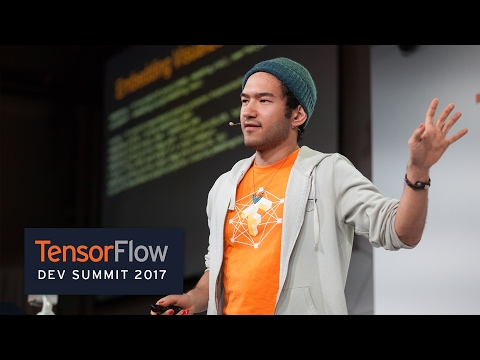

In [4]:
# to find out more about TensorBoard at 
# https://www.tensorflow.org/get_started/graph_viz 
# and watch this presentation:
from IPython.display import YouTubeVideo
YouTubeVideo("eBbEDRsCmv4", autoplay=0, theme="dark", color="red")

In [53]:
# so, since we now know some basics let's jump into Deep Learning with Tensorflow

In [54]:
# TODO

In [55]:
# let's look at a high level abstraction library tflearn
# pip install tflearn

In [7]:
# simple linear regression example
import tflearn
from __future__ import absolute_import, division, print_function
# Regression data
X = [3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1]
Y = [1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]

# Linear Regression graph
input_ = tflearn.input_data(shape=[None])
linear = tflearn.single_unit(input_)
regression = tflearn.regression(linear, optimizer='sgd', loss='mean_square',
                                metric='R2', learning_rate=0.01)
m = tflearn.DNN(regression)
m.fit(X, Y, n_epoch=1000, show_metric=True, snapshot_epoch=False)

print("\nRegression result:")
print("Y = " + str(m.get_weights(linear.W)) +
      "*X + " + str(m.get_weights(linear.b)))

Training Step: 1000  | total loss: 0.15402 | time: 0.002s
| SGD | epoch: 1000 | loss: 0.15402 - R2: 0.9737 -- iter: 17/17

Regression result:
Y = [ 0.2565726]*X + [ 0.7637955]

Test prediction for x = 3.2, 3.3, 3.4:
[ 1.5848279   1.61048508  1.63614237]


In [ ]:
print("\nTest prediction for x = 3.2, 3.3, 3.4:")
print(m.predict([3.2, 3.3, 3.4]))

In [ ]:
# another example with Titanic Dataset from Kaggle

In [12]:
# http://tflearn.org/tutorials/quickstart.html
import numpy as np
import tflearn
# make sure you have pandas=0.19.2 in your virtual environment for this example to work
# conda install pandas=0.19.2

# Download the Titanic dataset
from tflearn.datasets import titanic
titanic.download_dataset('titanic_dataset.csv')

# Load CSV file, indicate that the first column represents labels
from tflearn.data_utils import load_csv
data, labels = load_csv('titanic_dataset.csv', target_column=0,
                        categorical_labels=True, n_classes=2)

# let's look at the data

# print column names
print(" class |", " name |", " sex |", " age |", " # of siblings on board |", " # of parents/children on board |", " ticket # |", " fare |")
# print data rows
for element in data:
    print(element)
    

 class |  name |  sex |  age |  # of siblings on board |  # of parents/children on board |  ticket # |  fare |
['1', 'Allen, Miss. Elisabeth Walton', 'female', '29', '0', '0', '24160', '211.3375']
['1', 'Allison, Master. Hudson Trevor', 'male', '0.9167', '1', '2', '113781', '151.5500']
['1', 'Allison, Miss. Helen Loraine', 'female', '2', '1', '2', '113781', '151.5500']
['1', 'Allison, Mr. Hudson Joshua Creighton', 'male', '30', '1', '2', '113781', '151.5500']
['1', 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)', 'female', '25', '1', '2', '113781', '151.5500']
['1', 'Anderson, Mr. Harry', 'male', '48', '0', '0', '19952', '26.5500']
['1', 'Andrews, Miss. Kornelia Theodosia', 'female', '63', '1', '0', '13502', '77.9583']
['1', 'Andrews, Mr. Thomas Jr', 'male', '39', '0', '0', '112050', '0.0000']
['1', 'Appleton, Mrs. Edward Dale (Charlotte Lamson)', 'female', '53', '2', '0', '11769', '51.4792']
['1', 'Artagaveytia, Mr. Ramon', 'male', '71', '0', '0', 'PC 17609', '49.5042']
['1', 'Astor

In [ ]:
# Preprocessing function
def preprocess(data, columns_to_ignore):
    # Sort by descending id and delete columns
    for id in sorted(columns_to_ignore, reverse=True):
        [r.pop(id) for r in data]
    for i in range(len(data)):
        # Converting 'sex' field to float (id is 1 after removing labels column)
        data[i][1] = 1. if data[i][1] == 'female' else 0.
    return np.array(data, dtype=np.float32)

# Ignore 'name' and 'ticket' columns (id 1 & 6 of data array)
to_ignore=[1, 6]

# Preprocess data
data = preprocess(data, to_ignore)

In [10]:
# Build neural network
net = tflearn.input_data(shape=[None, 6])
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 2, activation='softmax')
net = tflearn.regression(net)

# Define model
model = tflearn.DNN(net)
# Start training (apply gradient descent algorithm)
model.fit(data, labels, n_epoch=10, batch_size=16, show_metric=True)

# if this doesn't work, restart your notebook kernel!

IndexError: list index out of range

In [2]:
# Let's create some data for DiCaprio and Winslet
dicaprio = [3, 'Jack Dawson', 'male', 19, 0, 0, 'N/A', 5.0000]
winslet = [1, 'Rose DeWitt Bukater', 'female', 17, 1, 2, 'N/A', 100.0000]
# Preprocess data
dicaprio, winslet = preprocess([dicaprio, winslet], to_ignore)
# Predict surviving chances (class 1 results)
pred = model.predict([dicaprio, winslet])
print("DiCaprio Surviving Rate:", pred[0][1])
print("Winslet Surviving Rate:", pred[1][1])

DiCaprio Surviving Rate: 0.164075
Winslet Surviving Rate: 0.985696


In [ ]:
# continue learning

In [ ]:
# If you have to use Tensorflow on CPUs, check this article by Intel:
# https://software.intel.com/en-us/articles/tensorflow-optimizations-on-modern-intel-architecture

In [ ]:
# Want to meet Tensorflow developers?
# You are in luck, they are coming to Munich in a couple of weeks for a meetup (July 25):
# https://www.meetup.com/Hacking-Machine-Learning/events/240095377/